#  Feature Extraction from Audio

## Load the audio file

In [1]:
import librosa
audio_path = 'banana01.wav'
x , sr = librosa.load(audio_path)

## Playing the audio file

In [2]:
import IPython.display as ipd
ipd.Audio(audio_path)

## Visualizing Audio

### Waveform
We can plot the audio array using librosa.display.waveplot:

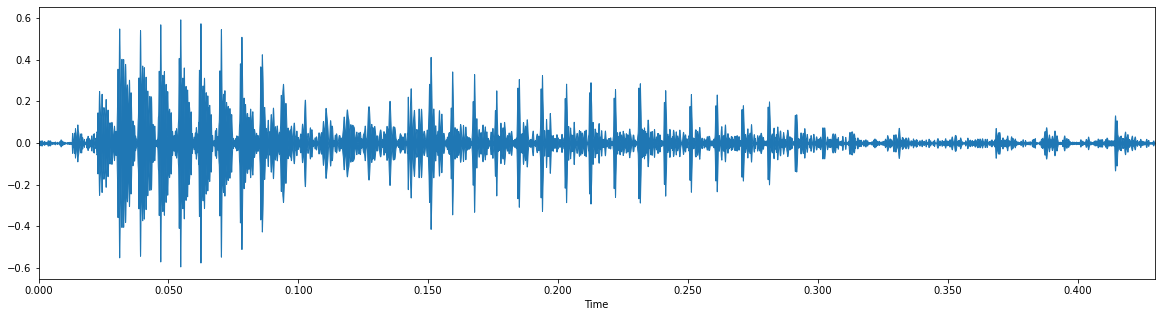

In [12]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

Here, we have the plot the amplitude envelope of a waveform.

# Spectrogram
We can also display a spectrogram using librosa.display.specshow.

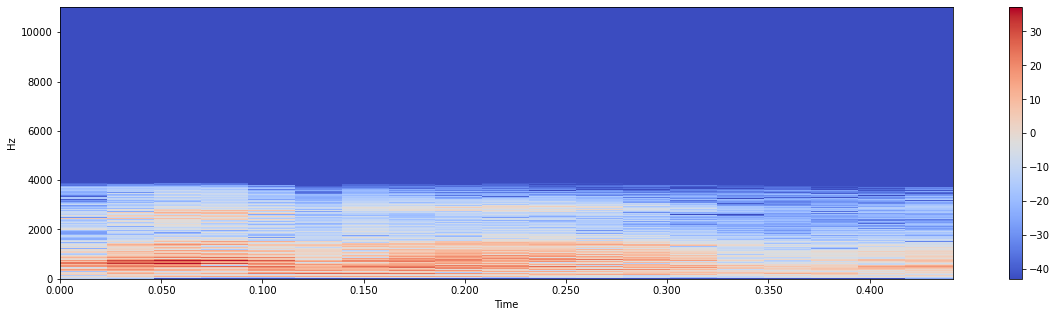

In [4]:
X = librosa.stft(x)
"""
Sound is measured in units called decibels (dB). The higher the decibel level,
the louder the noise. On the decibel scale,
the level increase of 10 means that a sound is actually 10 times more intense, or powerful.
"""
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Log Frequency axis

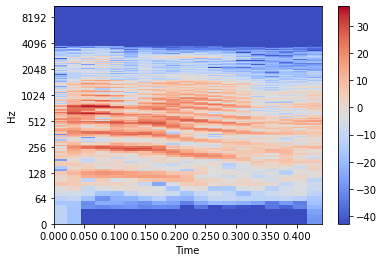

In [5]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

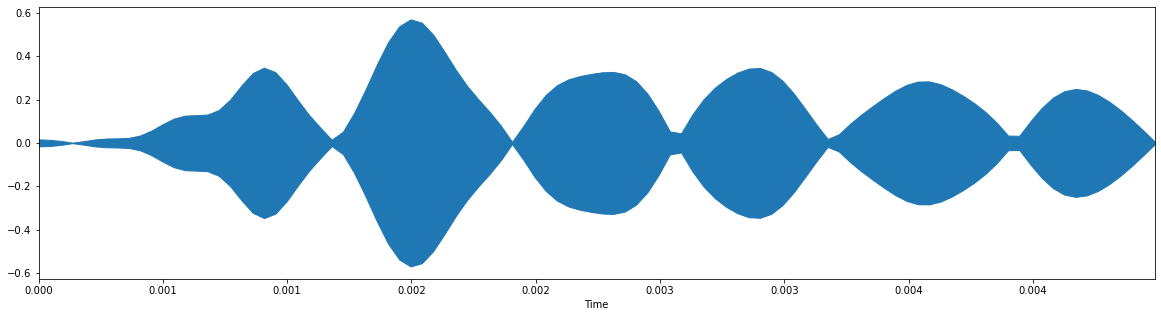

In [6]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display
# Zooming in
n0 = 1000
n1 = 1100
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x[n0:n1], sr=sr)

## Zero Crossing Rate

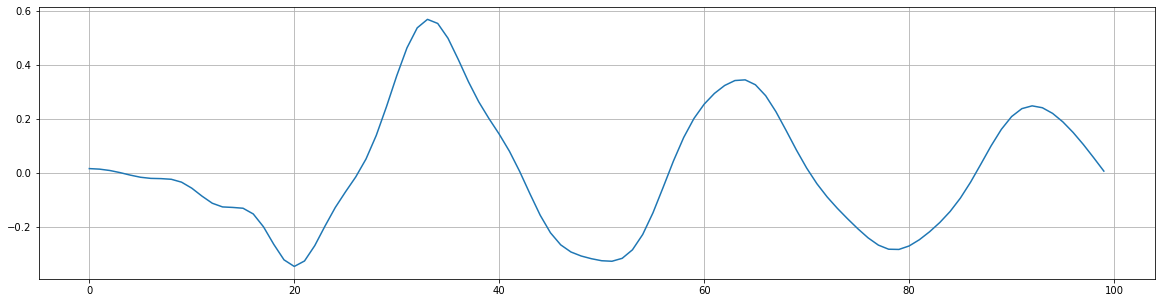

In [7]:
# Zooming in
n0 = 1000
n1 = 1100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [8]:
y, sr = librosa.load('banana01.wav')
librosa.feature.zero_crossing_rate(y)

array([[0.03466797, 0.05322266, 0.06982422, 0.06152344, 0.05322266,
        0.046875  , 0.04589844, 0.04931641, 0.05908203, 0.06396484,
        0.06494141, 0.06591797, 0.06640625, 0.06494141, 0.05957031,
        0.06152344, 0.06054688, 0.05224609, 0.04101562]])

I count 6 zero crossings. Let's compute the zero crossings using librosa.

In [9]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [10]:
print(sum(zero_crossings))

6


## Energy

The energy of a signal is the total magnitude of the signal, i.e. how loud the signal is. It is defined as:

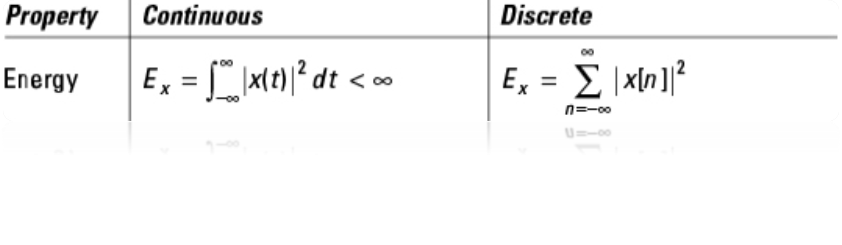

In [15]:
import numpy as np
def rmse(x):
    return np.sum(x**2)

In [16]:
rmse(x)

73.88799

In [ ]:
#rmse = librosa.feature.rmse(y)[0]

## Tempo

Tempo means the speed at which a piece of music should be played. 

In [17]:
tempo = librosa.beat.tempo(x)[0]

In [18]:
tempo

135.99917763157896

## 2.Spectral Centroid


In [19]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(19,)